In [155]:
import pickle
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
import seaborn as sns

n=1000
mcmc = pickle.load(open(f'../model/mem_two_proxies_{n}.pkl','rb'))
params={'beta0':-1, 'beta1':2, 'gam0':-1, 'gam1':3 , 'mu_x':0.5, 's2_x':1, 's2_ep':1, 's2_v':1, 's2_d':1}


beta0 = mcmc.act_params['beta0']
beta1 = mcmc.act_params['beta1']
gam0 = mcmc.act_params['gam0']
gam1 = mcmc.act_params['gam1']
mu_x = mcmc.act_params['mu_x']
s2_x = mcmc.act_params['s2_x']
s2_ep = mcmc.act_params['s2_ep']
s2_v = mcmc.act_params['s2_v']
s2_d = mcmc.act_params['s2_d']
y = mcmc.act_params['y']
x = mcmc.act_params['x']
w = mcmc.act_params['w']
z = mcmc.act_params['z']

np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
d = np.random.normal(0, np.sqrt(s2_d), n)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
ep = np.random.normal(0, np.sqrt(s2_ep), n)

# observed
w = x+v
z = gam0 + gam1*x + d
y = beta0 + beta1*x + ep

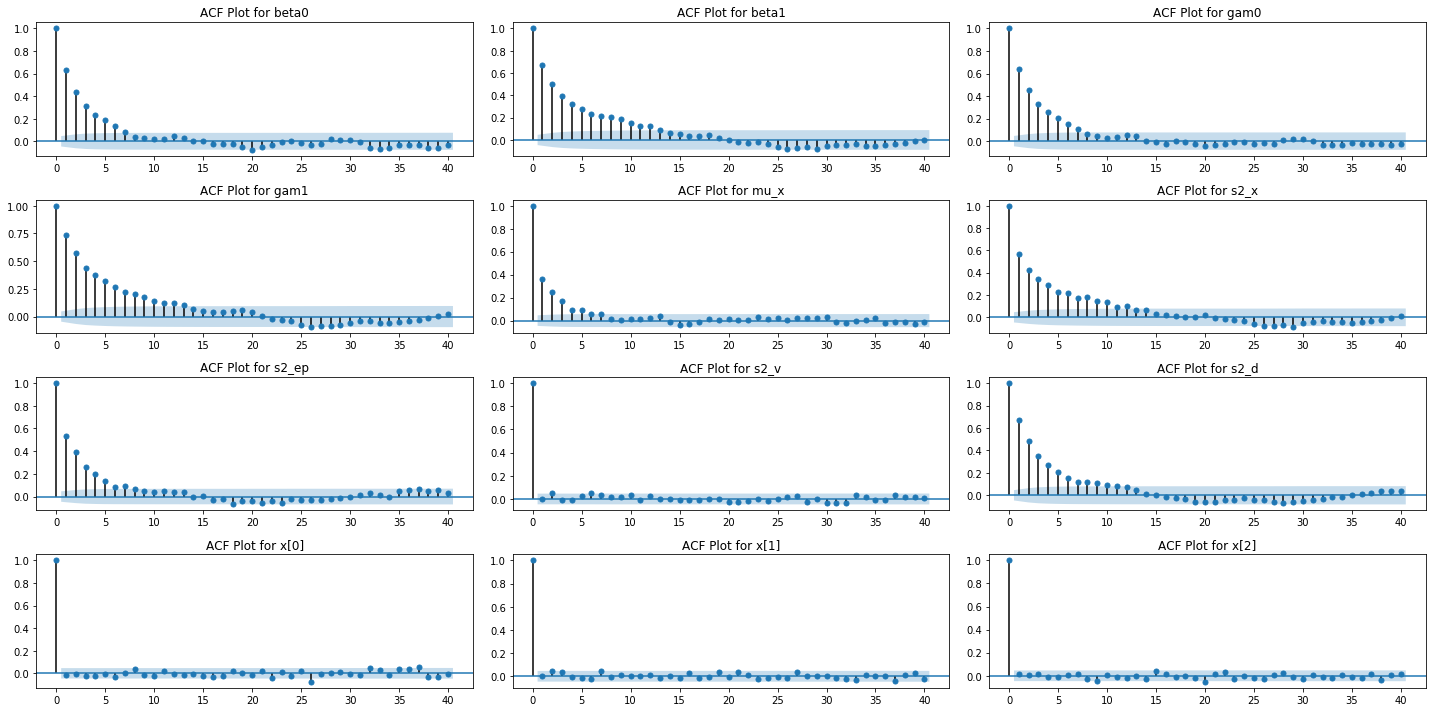

In [156]:
burnin = 1000
thinning = 5

fig, ax = plt.subplots(4,3,figsize=(20,10))
a = 0
for i in range(4):
    for j in range(3):
        
        if i==3:
            key = 'x'
            plot_acf(mcmc.params[key][j,:][burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            plot_acf(np.array(mcmc.params[key])[burnin::thinning], lags=40, ax=ax[i][j])
            ax[i][j].set_title(f'ACF Plot for {key}')
            
        a += 1
fig.tight_layout()
plt.savefig('autocorr.png')
plt.show()

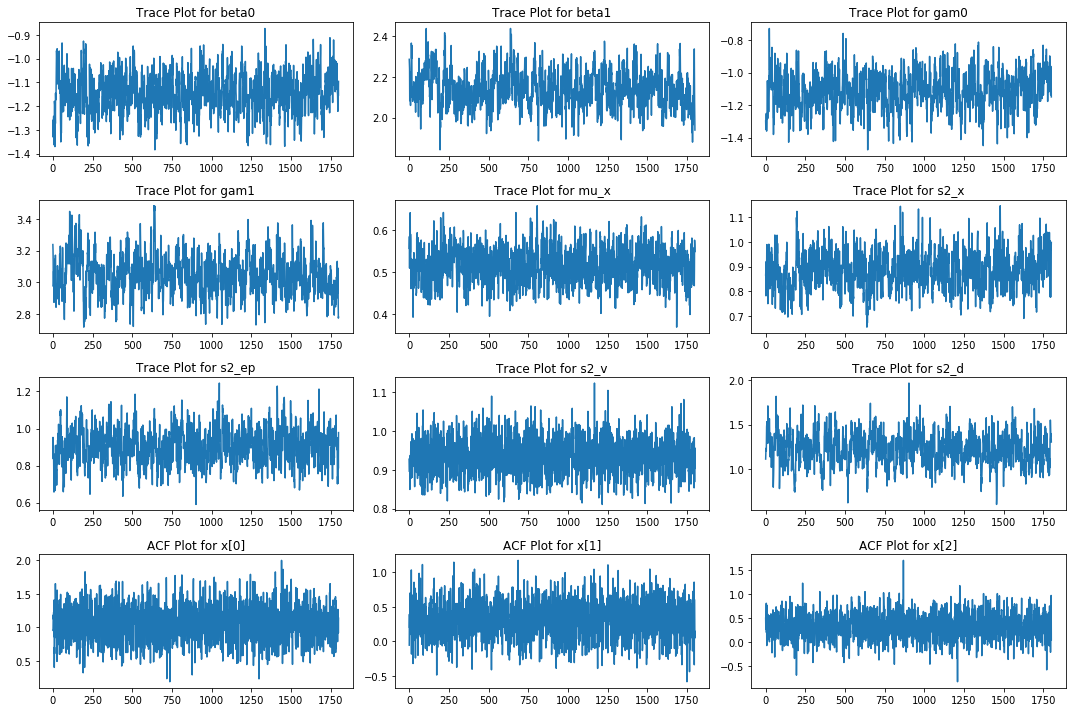

In [157]:
fig, ax = plt.subplots(4,3,figsize=(15,10))
a = 0
for i in range(4):
    for j in range(3):
        if i==3:
            key = 'x'
            ax[i][j].plot(mcmc.params[key][j,:][burnin::thinning])
            ax[i][j].set_title(f'ACF Plot for {key}[{j}]')
        else:
            key = list(mcmc.params.keys())[a]
            ax[i][j].plot(mcmc.params[key][burnin::thinning])
            ax[i][j].set_title(f'Trace Plot for {key}')
        a += 1
fig.tight_layout()
plt.savefig('traceplot.png')
plt.show()

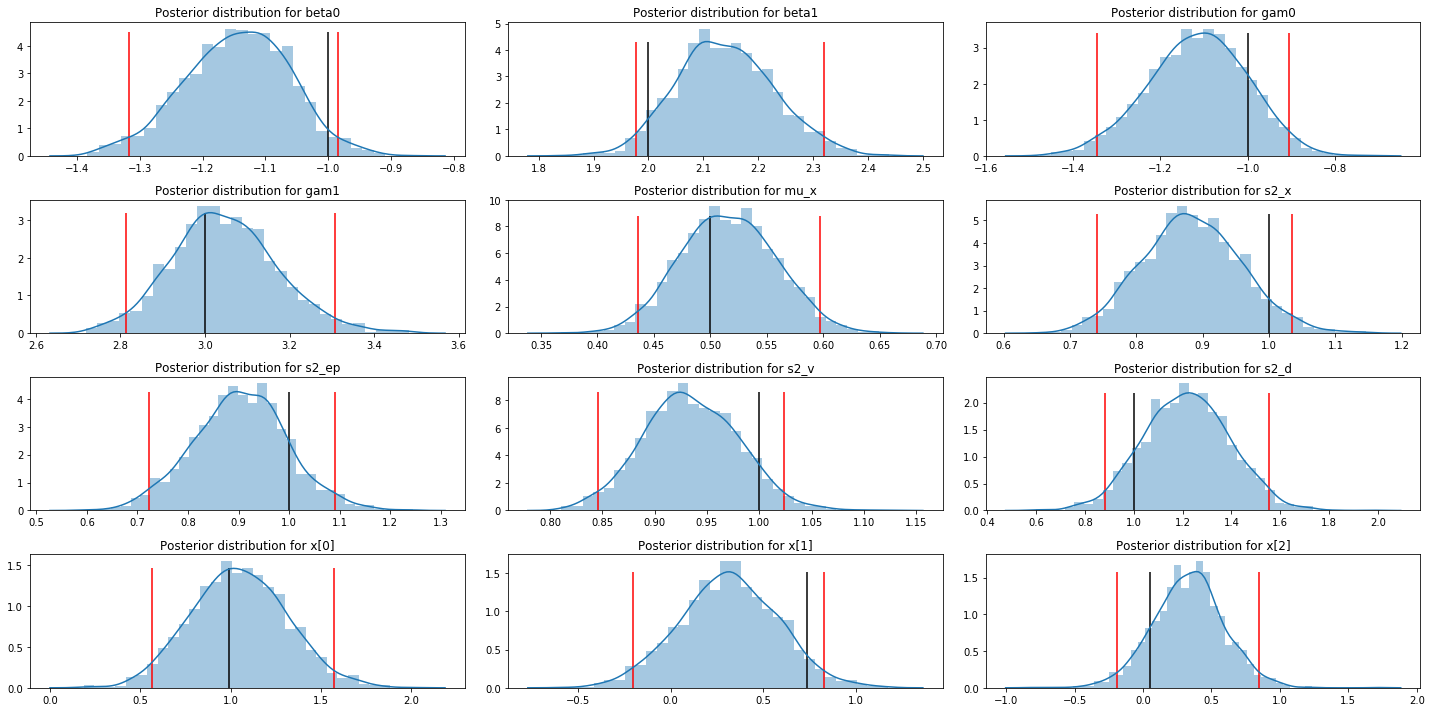

In [158]:
fig, ax = plt.subplots(4,3,figsize=(20,10))
a = 0
for i in range(4):
    for j in range(3):
        if i==3:
            key = 'x'
            sns.distplot(mcmc.params[key][j,:][burnin::thinning], ax=ax[i][j], norm_hist=True)
            kdeline = ax[i][j].lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            ax[i][j].vlines(x[j] ,0, ys.max())
            ax[i][j].set_title(f'Posterior distribution for {key}[{j}]')
            
            lower, upper = credible_interval(mcmc.params[key][j,:][burnin::thinning], 0.05)
            ax[i][j].vlines(lower ,0, ys.max(),  colors='r')
            ax[i][j].vlines(upper ,0, ys.max(),  colors='r')
            
            
            
        else:
            key = list(mcmc.params.keys())[a]
            sns.distplot(mcmc.params[key][burnin::thinning], ax=ax[i][j], norm_hist=True)
            kdeline = ax[i][j].lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            ax[i][j].vlines(params[key] ,0, ys.max())
            ax[i][j].set_title(f'Posterior distribution for {key}')
            
            lower, upper = credible_interval(mcmc.params[key][burnin::thinning], 0.05)
            ax[i][j].vlines(lower ,0, ys.max(),  colors='r')
            ax[i][j].vlines(upper ,0, ys.max(),  colors='r')
            
        a += 1
fig.tight_layout()
plt.savefig(f'/Users/shinbo/Desktop/metting/LDA/meeting materials/20.12.18/density_mem_{n}.png')
plt.show()

In [163]:
mcmc_120 = pickle.load(open('../model/mem_two_proxies_120.pkl','rb'))
mcmc_300 = pickle.load(open('../model/mem_two_proxies_300.pkl','rb'))
mcmc_500 = pickle.load(open('../model/mem_two_proxies_500.pkl','rb'))
mcmc_1000 = pickle.load(open('../model/mem_two_proxies_1000.pkl','rb'))
params={'beta0':-1, 'beta1':2, 'gam0':-1, 'gam1':3 , 'mu_x':0.5, 's2_x':1, 's2_ep':1, 's2_v':1, 's2_d':1}

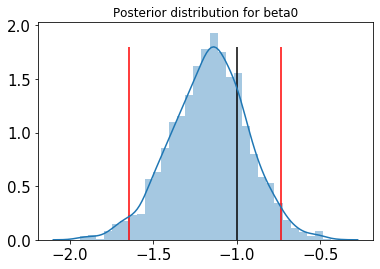

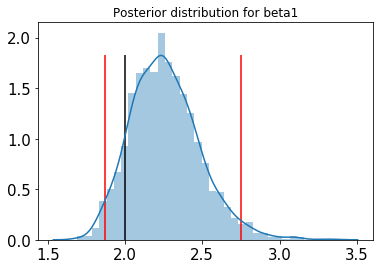

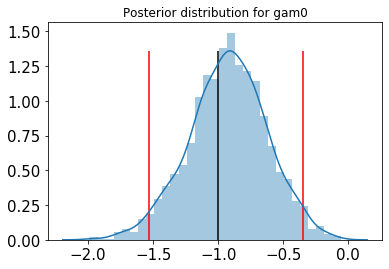

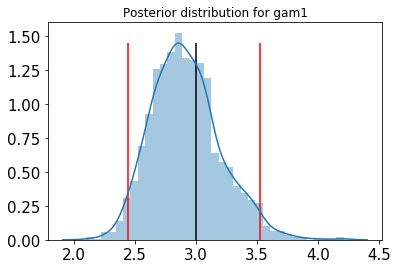

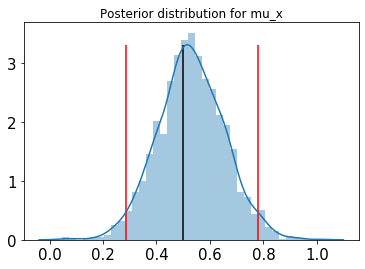

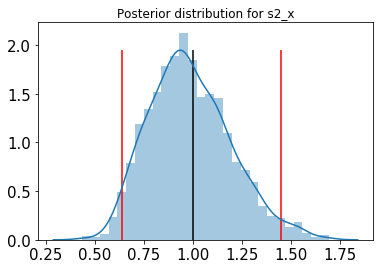

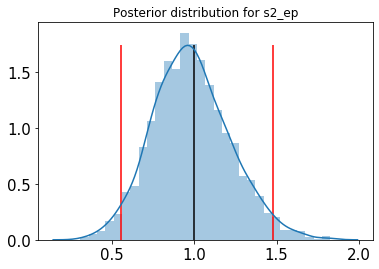

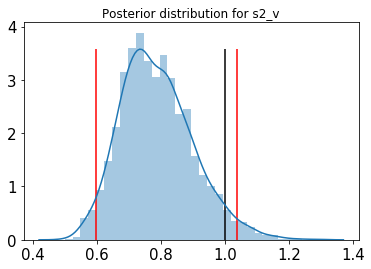

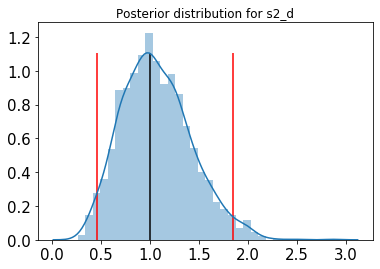

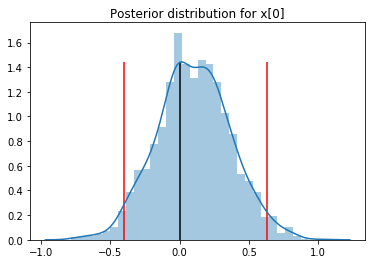

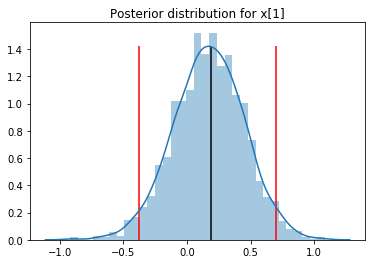

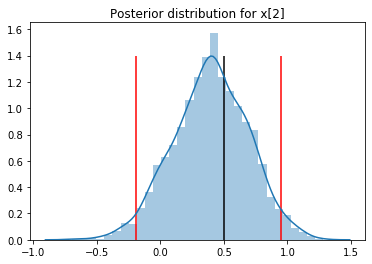

In [171]:
dir_ = '/Users/shinbo/Desktop/metting/LDA/meeting materials/20.12.18/'
n = 120
np.random.seed(1)
v = np.random.normal(0, np.sqrt(s2_v), n)
d = np.random.normal(0, np.sqrt(s2_d), n)
x = np.random.normal(mu_x, np.sqrt(s2_x), n)
ep = np.random.normal(0, np.sqrt(s2_ep), n)

mcmc_dict = {
    120:mcmc_120,
    300:mcmc_300,
    500:mcmc_500,
    1000:mcmc_1000
}
mcmc = mcmc_dict[n]

for key in mcmc.params.keys():
    
    if key == 'x':
        for j in range(3):
            samples = mcmc.params[key][j,:][burnin::thinning]
            fig, ax = plt.subplots()
            fig = sns.distplot(samples, norm_hist=True)
            kdeline = fig.lines[0]
            xs = kdeline.get_xdata()
            ys = kdeline.get_ydata()
            fig.vlines(x[j] ,0, ys.max())
            fig.set_title(f'Posterior distribution for {key}[{j}]')

            lower, upper = credible_interval(samples, 0.05)
            fig.vlines(lower ,0, ys.max(),  colors='r')
            fig.vlines(upper ,0, ys.max(),  colors='r')

            try:
                os.mkdir(dir_ + key,)
                ax.figure.savefig(dir_ + key + '/' + key + f'{j}_{n}.png')
            except:
                ax.figure.savefig(dir_ + key + '/' + key + f'{j}_{n}.png')
            
    else:
        samples = mcmc.params[key][burnin::thinning]
    
        fig, ax = plt.subplots()
        fig = sns.distplot(samples, norm_hist=True)
        kdeline = fig.lines[0]
        xs = kdeline.get_xdata()
        ys = kdeline.get_ydata()
        fig.vlines(params[key] ,0, ys.max())
        fig.set_title(f'Posterior distribution for {key}')

        lower, upper = credible_interval(samples, 0.05)
        fig.vlines(lower ,0, ys.max(),  colors='r')
        fig.vlines(upper ,0, ys.max(),  colors='r')
        ax.tick_params(axis='both', which='major', labelsize=15)

        try:
            os.mkdir(dir_ + key)
            ax.figure.savefig(dir_ + key + '/' + key + f'_{n}.png')
        except:
            ax.figure.savefig(dir_ + key + '/' + key + f'_{n}.png')

In [39]:
def credible_interval(x, alpha):
    n = len(x)
    sided = int(alpha/2 * n)
    x = sorted(list(x))
    
    lower = x[sided]
    upper = x[n-sided]
    return round(lower,3),round(upper,3)

def print_credible_interval(mcmc):
    print('====================== 95% credible interval for each parameter ======================')
    print('Parameter  Lower  Upper  True')
    params_name = mcmc.params.keys()
    a = 0
    for n in params_name:

        if n == 'x':
            for i in range(3):
                lower, upper = credible_interval(mcmc.params[n][i,:][burnin::thinning], 0.05)
                print(f'{n}[{i}]:    {lower},  {upper},  {round(x[a],3)}')
                a += 1
        else:
            lower, upper = credible_interval(mcmc.params[n][burnin::thinning], 0.05)
            print(f'{n}:    {lower},  {upper},  {params[n]}')